# Inspect Extraction of BREAKOUT
___
* Reward/Trial
* Inspect observations

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import gym

In [2]:
from pathlib import Path
path = str(Path(os.getcwd()).parent.parent)

import sys
sys.path.insert(0,path)

In [3]:
path = '/home/student/Dropbox/MA/worldmodel/worldmodel-breakout-server-version-v3/200321'

In [4]:
# SET
server = True
if server:
    path = '/home/student/Dropbox/MA/worldmodel/worldmodel-breakout-server-version-v3/200321'
    obs_path = path + '/record'
    vae_path = path + '/tf_vae'
    trainparam_path = path + '/tf_vae/vae_train_param.json'

In [7]:
def load_raw_data_list(filelist):
    data_list = []
    action_list = []
    reward_list = []
    counter = 0
    for i in range(len(filelist)):
        filename = filelist[i]
        raw_data = np.load(os.path.join(obs_path, filename))
        # data_list.append(raw_data['obs'])
        action_list.append(raw_data['action'])
        reward_list.append(raw_data['reward'])
        if ((i+1) % 1000 == 0):
            print("loading file", (i+1))
    return action_list, reward_list #data_list, action_list, reward_list

In [8]:
filelist = os.listdir(obs_path)
action_dataset, reward_dataset = load_raw_data_list(filelist)
len(action_dataset)

loading file 1000
loading file 2000
loading file 3000
loading file 4000
loading file 5000
loading file 6000
loading file 7000
loading file 8000
loading file 9000
loading file 10000


10000

In [ ]:
len_dataset = len(dataset)
counter = 0
len_complete = 0
for elem in dataset:
    len_complete = len_complete + len(elem)
    counter +=1
len_complete

## Reward

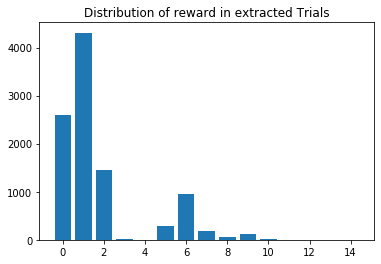

In [9]:
episode_rew = []
for elem in reward_dataset:
    episode_rew.append(sum(elem))
set_rew = set(episode_rew)
rew_counted = []
x_rew_counted = []
for elem in set_rew:
    x_rew_counted.append(elem)
    rew_counted.append(episode_rew.count(elem))

plt.bar(x_rew_counted,rew_counted)
plt.title('Distribution of reward in extracted Trials')
plt.show()

## Action

In [10]:
action_list = []
for trial in action_dataset:
    for frame in trial:
        index =np.where(frame==1)
        action_list.append(index[0].item(0))
# action_list: list with occured actions

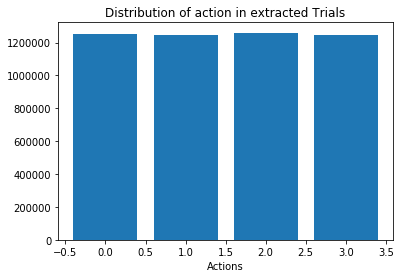

[1251172, 1244260, 1259591, 1244977]
Meaning of Actions: [0, 1, 2, 3] is  ['NOOP', 'FIRE', 'RIGHT', 'LEFT']


/home/student/PycharmProjects/worldmodel/venv/lib/python3.6/site-packages/gym/envs/registration.py:17: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [12]:
set_action = set(action_list)
action_counted = []

for elem in set_action:
    action_counted.append(action_list.count(elem))
    
plt.bar(list(set_action),action_counted)
plt.title('Distribution of action in extracted Trials')
plt.xlabel('Actions')
plt.show()

print(action_counted)

env = gym.make('Breakout-v0')
print('Meaning of Actions: [0, 1, 2, 3] is ', env.env.get_action_meanings())

In [ ]:
set_action

## Observations
just few trials need to be unpacked - otherwise kernel crashes

In [ ]:
import base64
import imageio
import IPython

In [ ]:
def embed_mp4(filename,video):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="400" height="300" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)

In [ ]:
filename = 'observations_200321.mp4'
with imageio.get_writer(filename, mode='I') as video:    
    for image in range(390):
        video.append_data(np.array(dataset[0][image]*255, dtype=np.uint8))
embed_mp4(filename,video)